# **Problem 1**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# ***1***

## **A**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML/Class 1 - EDA/Datasets/NasdaqReturns.csv")
df.head(10)

,StockSymbol,Industry,SubIndustry,Ret2000.01,Ret2000.02,Ret2000.03,Ret2000.04,Ret2000.05,Ret2000.06,ret2000.07,...,Ret2009.03,Ret2009.04,Ret2009.05,Ret2009.06,Ret2009.07,Ret2009.08,Ret2009.09,Ret2009.10,Ret2009.11,Ret2009.12
0,AAON,Industrial Goods,General Building Materials,0.080678,0.066250,0.032941,0.183099,0.130334,-0.017642,-0.020517,...,0.185088,0.100565,0.067762,-0.045062,-0.025832,0.060976,-0.039234,-0.101297,0.041804,0.019885
1,AAPL,Consumer Goods,Electronic Equipment,-0.010680,0.102115,0.145496,-0.084428,-0.327300,-0.359266,-0.025321,...,0.192919,0.208858,0.079571,0.043673,0.138606,0.018159,0.103339,0.016995,0.053267,0.041980
2,ABAX,Healthcare,Diagnostic Substances,0.047742,0.035990,0.039702,-0.162353,-0.147427,0.048589,-0.135385,...,0.111541,-0.119907,0.162126,0.161108,0.304581,0.001883,0.014026,-0.141783,-0.024740,0.134043
3,ABCB,Financial,Regional,-0.074040,-0.048170,0.018219,-0.024679,-0.006036,-0.025304,-0.094000,...,-0.024845,0.402570,-0.039816,-0.020155,0.004651,0.007812,0.122449,-0.170423,0.105351,0.062315
4,ABFS,Services,Trucking,-0.031046,-0.212677,0.091476,0.189338,-0.153846,-0.106115,0.355301,...,0.113583,0.227007,0.216357,-0.075114,0.069471,0.112273,-0.052831,-0.127703,-0.047582,0.191981
5,ABMD,Healthcare,Medical Appliances & Equipment,0.579800,0.332252,-0.405461,-0.060000,0.060732,-0.215361,0.274447,...,-0.267564,0.378099,-0.108108,0.467554,-0.154453,0.096689,0.175545,-0.067971,-0.073384,0.021053
6,ACAT,Consumer Goods,Recreational Vehicles,-0.006036,0.024291,0.018887,-0.012758,0.081489,0.105116,0.025963,...,0.110145,0.058201,0.002500,0.000000,0.520988,0.160976,0.004267,-0.152639,0.101142,0.341142
7,ACCL,Technology,Application Software,0.679187,0.793885,-0.289855,-0.156513,-0.480535,1.090131,-0.131396,...,0.137143,0.150895,0.042222,0.260128,0.003344,-0.043333,0.015762,-0.055652,-0.038532,0.089354
8,ACET,Basic Materials,Chemicals,-0.040000,-0.068182,-0.121951,0.181818,0.076923,0.023256,-0.087942,...,0.011885,0.220137,-0.148252,0.075806,0.053973,-0.051064,-0.006006,-0.159332,-0.061261,-0.024621
9,ACGL,Financial,Property & Casualty Insurance,0.152088,0.051724,0.100874,-0.067273,0.000000,0.004032,0.033333,...,0.016226,0.079798,-0.009069,0.050762,0.048735,0.042857,0.039077,0.002381,0.037862,0.015470


In [ ]:
df.shape

(1158, 123)

In [ ]:
df.describe()

,Ret2000.01,Ret2000.02,Ret2000.03,Ret2000.04,Ret2000.05,Ret2000.06,ret2000.07,Ret2000.08,Ret2000.09,Ret2000.10,...,Ret2009.03,Ret2009.04,Ret2009.05,Ret2009.06,Ret2009.07,Ret2009.08,Ret2009.09,Ret2009.10,Ret2009.11,Ret2009.12
count,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,...,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000
mean,0.018929,0.123730,-0.020539,-0.050440,-0.047875,0.085980,-0.012118,0.076216,-0.025683,-0.040439,...,0.119538,0.171191,0.052819,0.020645,0.076086,0.010889,0.045615,-0.054045,0.007672,0.063397
std,0.210686,0.381724,0.259361,0.175147,0.164255,0.250316,0.157280,0.203489,0.171024,0.170622,...,0.211184,0.229522,0.158939,0.146425,0.162370,0.121185,0.116763,0.113283,0.122344,0.227361
min,-0.632911,-0.550563,-0.712994,-0.826503,-0.780211,-0.717920,-0.761310,-0.522567,-0.660545,-0.685504,...,-0.443667,-0.565430,-0.416667,-0.697347,-0.440529,-0.362768,-0.464590,-0.621633,-0.507500,-0.572868
25%,-0.089393,-0.064291,-0.134984,-0.128853,-0.125614,-0.040234,-0.086401,-0.019370,-0.103812,-0.119781,...,0.004899,0.031434,-0.049775,-0.056959,-0.008671,-0.059295,-0.018873,-0.113152,-0.050868,-0.001698
50%,-0.009421,0.010051,-0.019615,-0.029293,-0.029387,0.029874,0.000000,0.040000,-0.013158,-0.028249,...,0.100236,0.127131,0.033635,0.005920,0.059940,-0.003335,0.035086,-0.051963,0.006536,0.046869
75%,0.086161,0.190414,0.067632,0.044656,0.032606,0.155719,0.064243,0.141159,0.054124,0.038931,...,0.203480,0.264194,0.125432,0.076812,0.139278,0.070880,0.100321,0.008920,0.060397,0.106266
max,1.411945,3.696592,4.008621,0.833333,0.959248,1.680342,0.763158,3.626609,1.051583,1.024000,...,2.725000,1.354730,1.108475,1.219837,2.550000,0.904762,0.994012,0.513849,0.729560,6.311189


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.duplicated().sum().sum()

0

In [ ]:
df.StockSymbol.nunique()

1158

## **B**

In [ ]:
industry_counts = df.groupby('Industry')["StockSymbol"].nunique()
print(industry_counts)

Industry
Basic Materials       50
Conglomerates          2
Consumer Cyclical      2
Consumer Goods        80
Financial            338
Healthcare           111
Industrial Goods      65
Services             202
Technology           296
Utilities             12
Name: StockSymbol, dtype: int64


## **C**

In [ ]:
at_least_10_dec_2000 = df[df['Ret2000.12'] >= 0.10]['StockSymbol'].nunique()
print(f"Companies with at least 10% return in Dec 2000: {at_least_10_dec_2000}")

Companies with at least 10% return in Dec 2000: 309


In [ ]:
less_than_neg_10_dec_2000 = df[df['Ret2000.12'] <= -0.10]['StockSymbol'].nunique()
print(f"Companies with at least -10% return in Dec 2000: {less_than_neg_10_dec_2000}")

Companies with at least -10% return in Dec 2000: 261


## **D**

In [ ]:
industry_declines_oct_2008 = df.groupby("Industry")["Ret2008.10"].mean()

largest_decline_industries = industry_declines_oct_2008.nsmallest(3)
print("Industries with the largest decline in Oct 2008:")
print(largest_decline_industries)

Industries with the largest decline in Oct 2008:
Industry
Conglomerates      -0.265748
Basic Materials    -0.254674
Industrial Goods   -0.233366
Name: Ret2008.10, dtype: float64


In [ ]:
# Calculate the average return for each sub-industry in October 2008
sub_industry_performance_oct_2008 = df.groupby('SubIndustry')['Ret2008.10'].mean()

# Identify sub-industries with positive returns
sub_industries_positive_oct_2008 = sub_industry_performance_oct_2008[sub_industry_performance_oct_2008 > 0]
print("Sub-industries with positive returns in Oct 2008:")
print(sub_industries_positive_oct_2008)


Sub-industries with positive returns in Oct 2008:
SubIndustry
Auto Parts Stores             0.020324
Foreign Money Center Banks    0.213287
Home Health Care              0.081868
Trucks & Other Vehicles       0.105902
Name: Ret2008.10, dtype: float64


# ***2***

## **A**

No need to scale as all features are already in the same scale.

## **B**

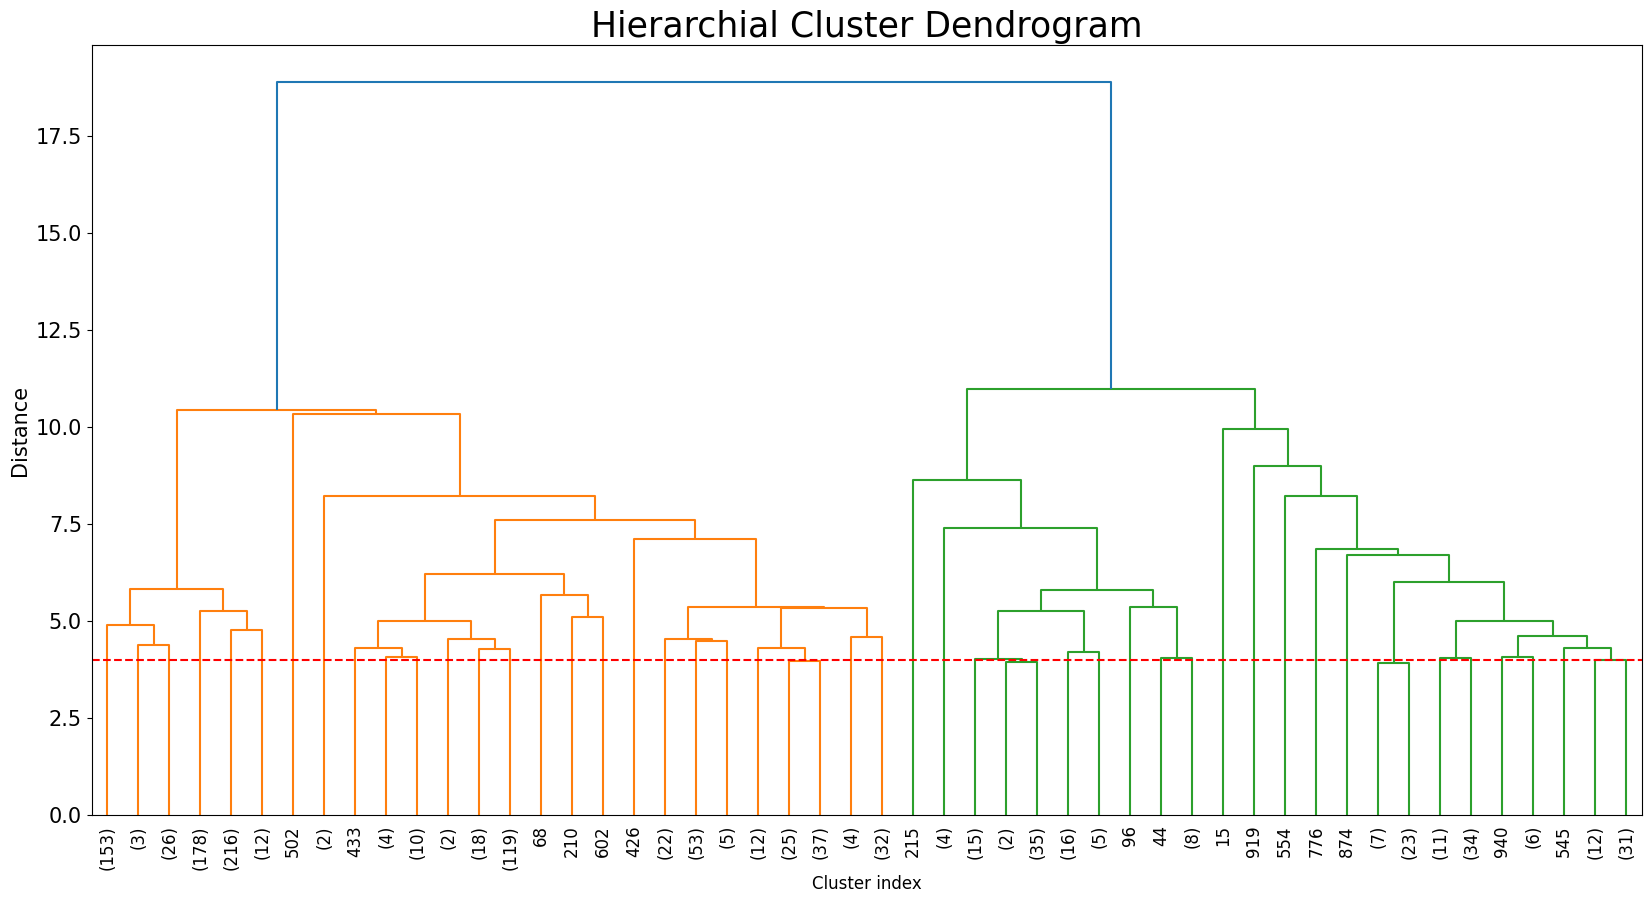

In [ ]:
required_features = df.drop(['StockSymbol', 'Industry','SubIndustry'],axis=1)
completeEuclidean = linkage(required_features, method='ward', metric = 'euclidean')
fig = plt.figure(figsize=(20, 10))
plt.title('Hierarchial Cluster Dendrogram',fontsize = 25)
plt.xlabel('Cluster index',fontsize = 12)
plt.ylabel('Distance',fontsize = 15)
plt.yticks(fontsize = 15)

dendrogram(completeEuclidean,truncate_mode= 'lastp', p = 50, leaf_rotation=90, leaf_font_size=12,show_leaf_counts = True)
plt.axhline(y=4, color='r', linestyle='--')
plt.show()

## **C**

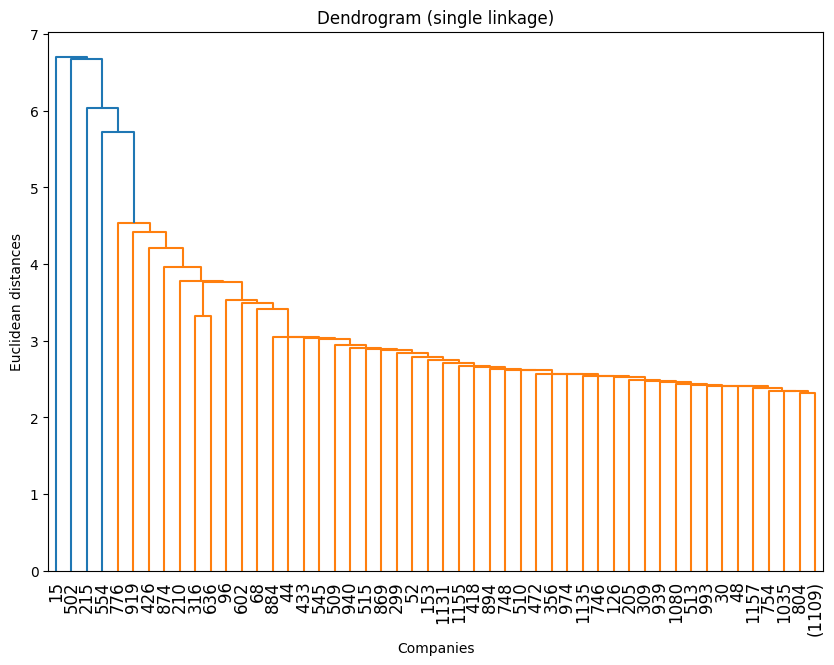

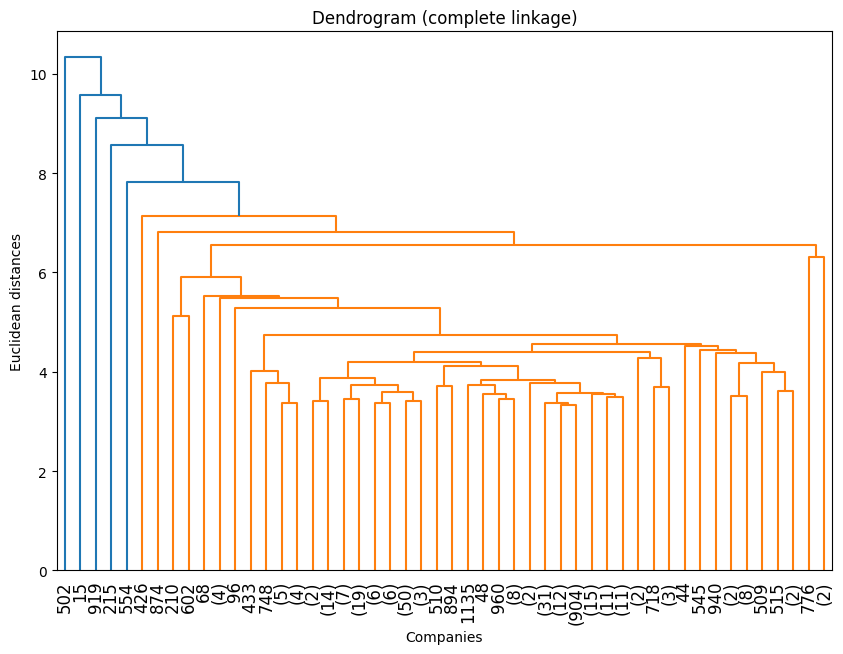

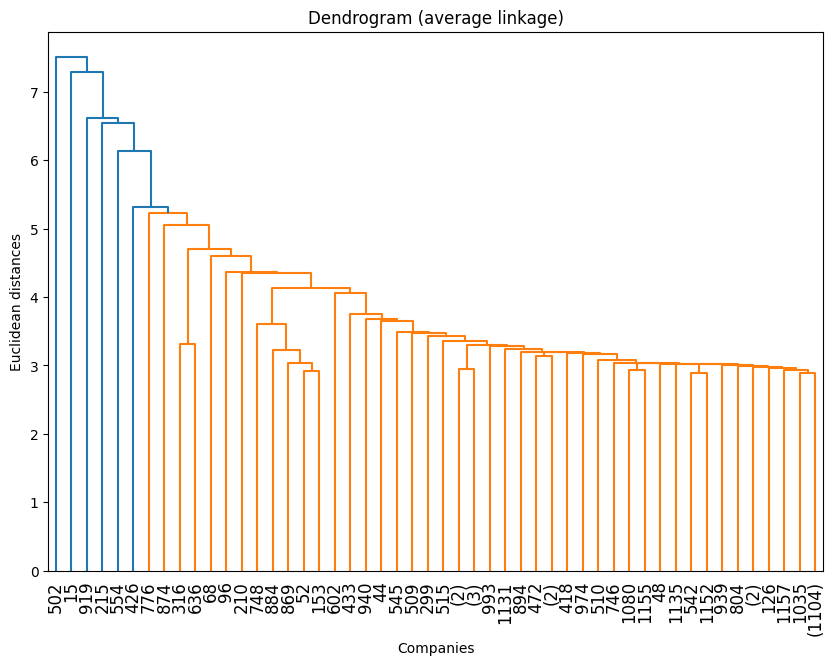

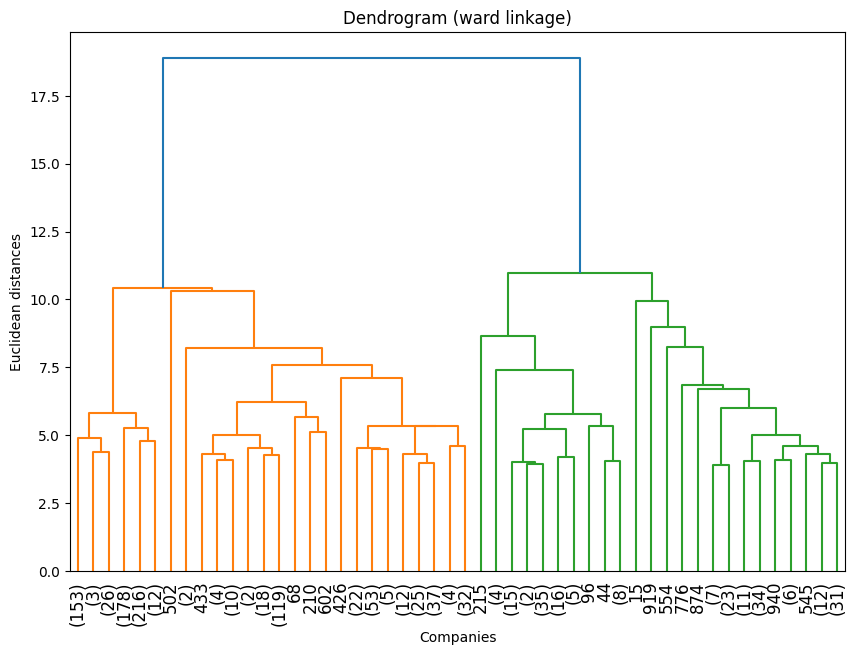

In [ ]:
methods = ['single', 'complete', 'average', 'ward']

for method in methods:
    linked = linkage(required_features, method=method, metric='euclidean')
    plt.figure(figsize=(10, 7))
    dendrogram(linked, truncate_mode= 'lastp', p = 50, leaf_rotation=90, leaf_font_size=12,show_leaf_counts = True)
    plt.title(f'Dendrogram ({method} linkage)')
    plt.xlabel('Companies')
    plt.ylabel('Euclidean distances')
    plt.show()


From all the above graphs that being applied the 4 methods of clustering, we can see that the Ward method provide the most balance result.

## **D**

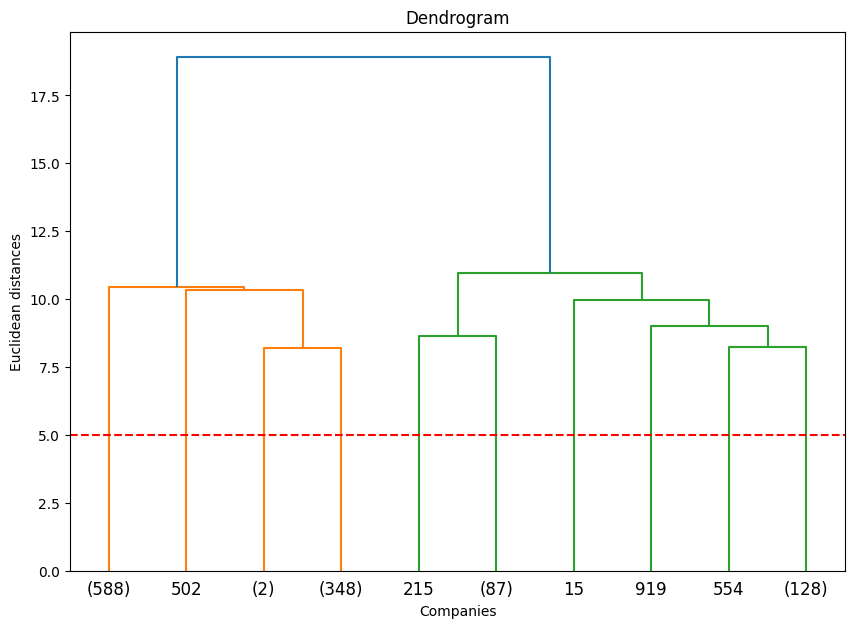

In [ ]:
# Plotting dendrogram again with optimal clusters marked
linked = linkage(required_features, method='ward', metric='euclidean')

plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=10)  # 'p' is the number of clusters you want to visualize
plt.title('Dendrogram')
plt.xlabel('Companies')
plt.ylabel('Euclidean distances')
plt.axhline(y=5, color='r', linestyle='--')  # threshold can be adjusted based on visual inspection
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

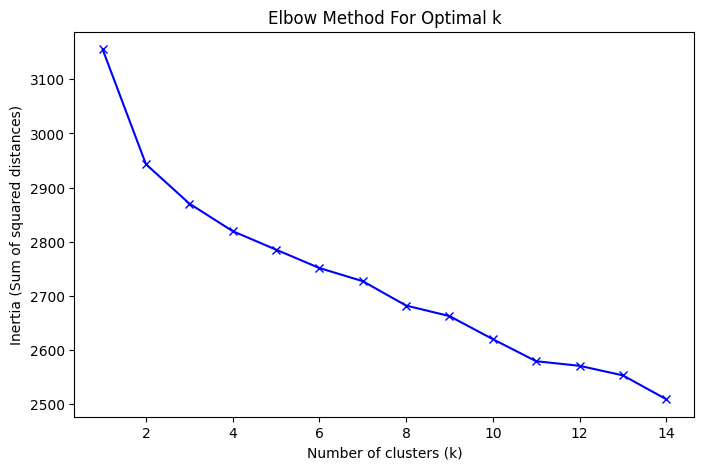

In [ ]:
inertia = []  # List to hold the inertia values for different k

# Try different values of k (number of clusters)
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(required_features)
    inertia.append(kmeans.inertia_)  # Inertia: sum of squared distances to closest cluster center

# Plot the elbow chart
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method For Optimal k')
plt.show()


So, after plotting the graph using elbow method, i believe that the most optimal K is 3, but i believe that choosing K as 4 or 5 is still acceptable.

# ***3***

## A, B, C, D, E

In [ ]:
n_clus = 5
agg_clustering = AgglomerativeClustering(n_clusters=n_clus, affinity='euclidean', linkage='ward')
cluster_labels = agg_clustering.fit_predict(required_features)

for i in range(n_clus):
    print('Cluster number',i)
    print('Number of companies:',len(df[agg_clustering.labels_==i])) #a
    print('Most common Industry is: ' + df[agg_clustering.labels_==i].Industry.value_counts().index[0]) #b
    print('Most common SubIndustry is ' + df[agg_clustering.labels_==i].SubIndustry.value_counts().index[0]) #c
    print('Mean:', required_features[agg_clustering.labels_==i].mean(axis=0).mean())
    print('Stdev:', required_features[agg_clustering.labels_==i].mean(axis=0).std())
    print('February 2000:',required_features[agg_clustering.labels_==i]['Ret2000.02'].mean())
    print('March 2000:',required_features[agg_clustering.labels_==i]['Ret2000.03'].mean())
    print('')




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster number 0
Number of companies: 131
Most common Industry is: Technology
Most common SubIndustry is Semiconductor
Mean: 0.010419559001717555
Stdev: 0.11665664756233468
February 2000: 0.19715089637404581
March 2000: -0.05205323205343512

Cluster number 1
Number of companies: 350
Most common Industry is: Technology
Most common SubIndustry is Application Software
Mean: 0.015344571379785713
Stdev: 0.06983001351982505
February 2000: 0.11370811916285715
March 2000: -0.003414696208571428

Cluster number 2
Number of companies: 88
Most common Industry is: Technology
Most common SubIndustry is Biotechnology
Mean: 0.01629513526145833
Stdev: 0.1425075513690747
February 2000: 1.0381046763863635
March 2000: -0.2593496133295455

Cluster number 3
Number of companies: 588
Most common Industry is: Financial
Most common SubIndustry is Regional
Mean: 0.006143887716354874
Stdev: 0.03754454619888262
February 2000: -0.02365955901530612
March 2000: 0.011428148748299323

Cluster number 4
Number of compani

## **F**

Generally, it observed a significant increase in Feb 2000 and a remarkable decrease in March 2000.
The reason for this is Dot-com bubble burst in March 2000.

# ***4***

# **A,B,C,D,E,F**

In [ ]:
mdlKMeans = KMeans(n_init = 1, n_clusters=5, random_state = 5)
mdlKMeans.fit(required_features)

km_l = mdlKMeans.labels_
for i in range(n_clus):
    print('Cluster number',i)
    print('Number of companies:',len(df[km_l == i]))
    print('Most common Industry is: ' + df[km_l == i].Industry.value_counts().index[0])
    print('Most common SubIndustry is ' + df[km_l == i].SubIndustry.value_counts().index[0])
    print('Mean:', required_features[km_l == i].mean(axis=0).mean())
    print('Stdev:', required_features[km_l == i].mean(axis=0).std())
    print('February 2000:',required_features[km_l == i]['Ret2000.02'].mean())
    print('March 2000:',required_features[km_l == i]['Ret2000.03'].mean())
    print('')

Cluster number 0
Number of companies: 69
Most common Industry is: Technology
Most common SubIndustry is Biotechnology
Mean: 0.018168854046739135
Stdev: 0.154973174983627
February 2000: 1.2324634181449274
March 2000: -0.3201879591449276

Cluster number 1
Number of companies: 260
Most common Industry is: Technology
Most common SubIndustry is Semiconductor
Mean: 0.010524982816762821
Stdev: 0.10029738306472252
February 2000: 0.2115260135846154
March 2000: -0.08554129476153846

Cluster number 2
Number of companies: 793
Most common Industry is: Financial
Most common SubIndustry is Regional
Mean: 0.008776933145029423
Stdev: 0.042889269658944636
February 2000: -0.009307446930643127
March 2000: 0.005840583479192937

Cluster number 3
Number of companies: 34
Most common Industry is: Technology
Most common SubIndustry is Semiconductor
Mean: 0.025580370922549014
Stdev: 0.12012765993318995
February 2000: 0.3282052952647059
March 2000: 0.4763076990882353

Cluster number 4
Number of companies: 2
Most 

# ***5***

Similar

# ***6***

Analyze the standard deviation within clusters to balance high-risk, high-reward stocks with more stable, lower-risk options.

Leverage the most common industries and sub-industries in each cluster to diversify investments across different economic sectors.

Can avoid industries with low return and high variance.